In [1]:
#BiocManager::install("apeglm")

In [1]:
library(tximportData)
library(tximport)
library(DESeq2)
library(tidyverse)
library(DEGreport)
library(pheatmap)
library(RColorBrewer)
library(apeglm)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading required p

In [2]:
samples <- read.table(file = "metadata_numerictime.tsv.txt", header = TRUE)
samples <- as.data.frame(unclass(samples),stringsAsFactors=TRUE)
samples$Time <- as.factor(samples$Time)
samples$Trt_Time <- paste(samples$Treatment, samples$Time, sep="_")
samples$Trt_Time <- as.factor(samples$Trt_Time)
samples

SampleName,Treatment,Time,Trt_Time
<fct>,<fct>,<fct>,<fct>
C_1_A,Uninfected,1,Uninfected_1
C_1_B,Uninfected,1,Uninfected_1
C_1_C,Uninfected,1,Uninfected_1
C_1_D,Uninfected,1,Uninfected_1
C_1_E,Uninfected,1,Uninfected_1
C_1_F,Uninfected,1,Uninfected_1
C_8_A,Uninfected,8,Uninfected_8
C_8_B,Uninfected,8,Uninfected_8
C_8_C,Uninfected,8,Uninfected_8


In [3]:
txdb <- read.table(file = "gene_2_tx.tsv", header = TRUE)
tx2gene <- txdb

In [4]:
files <- file.path("salmon_quant", "salmon", samples$SampleName, "quant.sf")
names(files) <- samples$SampleName
txi.salmon <- tximport(files, type = "salmon", tx2gene = tx2gene)
head(txi.salmon$counts)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 
31 
32 
33 
34 
35 
36 
37 
38 
39 
40 
41 
42 
43 
44 
45 
46 
47 
48 


summarizing abundance

summarizing counts

summarizing length



,C_1_A,C_1_B,C_1_C,C_1_D,C_1_E,C_1_F,C_8_A,C_8_B,C_8_C,C_8_D,...,V_24_C,V_24_D,V_24_E,V_24_F,V_96_A,V_96_B,V_96_C,V_96_D,V_96_E,V_96_F
TRINITY_DN0_c0_g1,4490.708,3898.111,6816.250,5244.265,5658.865,4545.606,5102.081,5131.738,5683.426,5264.201,...,6451.364,5375.294,6658.806,5705.084,3785.423,3262.685,3030.182,3394.920,3033.362,2928.931
TRINITY_DN0_c0_g2,4.000,6.000,17.000,8.000,10.000,6.000,8.000,22.000,12.000,11.000,...,6.000,11.000,12.000,6.000,3.000,6.000,3.000,4.000,8.000,4.000
TRINITY_DN0_c0_g3,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,0.000
TRINITY_DN0_c1_g1,73.250,64.943,152.050,124.758,127.939,93.405,453.622,373.047,509.331,431.117,...,219.163,183.695,250.006,195.472,394.395,306.893,265.258,344.766,249.255,263.474
TRINITY_DN0_c10_g1,1388.850,1023.287,1871.033,1460.069,1574.582,1358.728,1479.769,1413.415,1599.582,1450.988,...,1699.625,1406.224,1852.171,1526.316,1613.952,1437.908,1305.970,1533.899,1257.485,1239.962
TRINITY_DN0_c11_g1,5.311,4.000,5.000,2.000,5.000,6.000,6.000,6.000,8.170,11.000,...,9.000,4.000,9.000,4.002,7.000,3.000,4.098,4.000,5.000,6.000


In [5]:
## Create DESeq2Dataset object
dds <- DESeqDataSetFromTximport(txi.salmon, colData = samples, design = ~ Time + Treatment)

using counts and average transcript lengths from tximport



In [6]:
smallestGroupSize <- 3
keep <- rowSums(counts(dds) >= 10) >= smallestGroupSize
dds <- dds[keep,]

In [7]:
### Transform counts for data visualization
rld <- rlog(dds, blind=TRUE)

rlog() may take a few minutes with 30 or more samples,
vst() is a much faster transformation

using 'avgTxLength' from assays(dds), correcting for library size



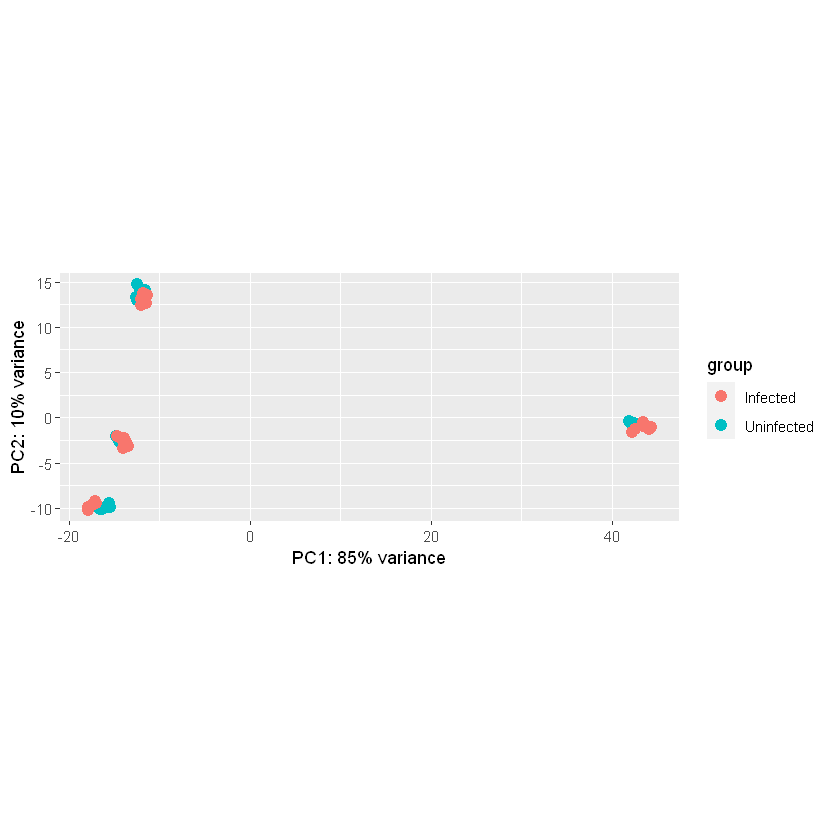

In [8]:
### Plot PCA 
plotPCA(rld, intgroup="Treatment")

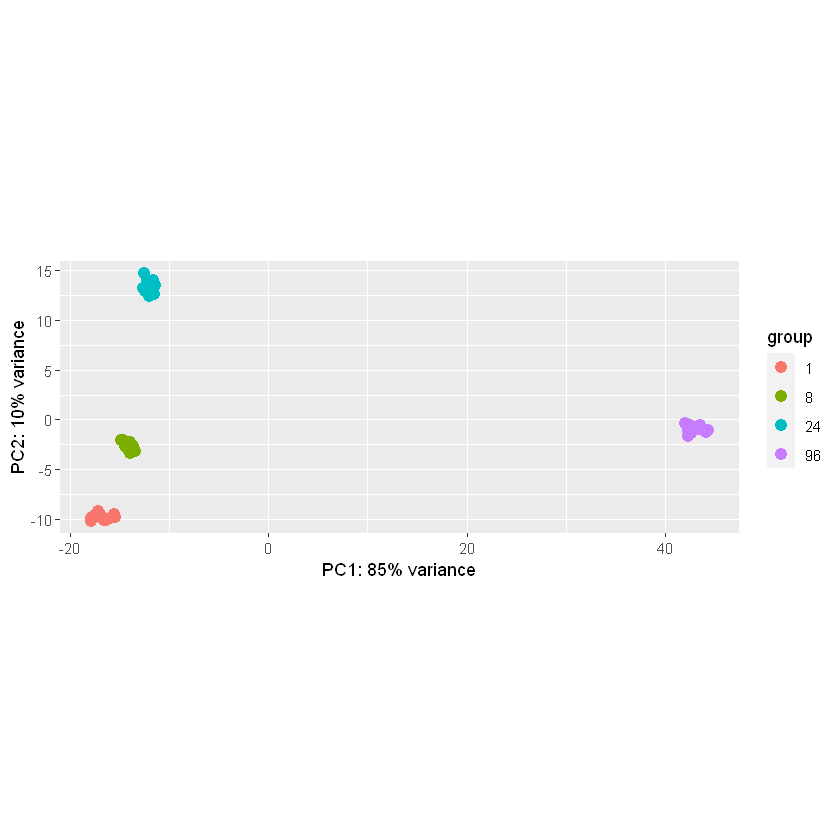

In [9]:
### Plot PCA 
plotPCA(rld, intgroup="Time")

In [10]:
# Input is a matrix of log transformed values
rld <- rlog(dds, blind=T)
rld_mat <- assay(rld)
pca <- prcomp(t(rld_mat))

rlog() may take a few minutes with 30 or more samples,
vst() is a much faster transformation

using 'avgTxLength' from assays(dds), correcting for library size



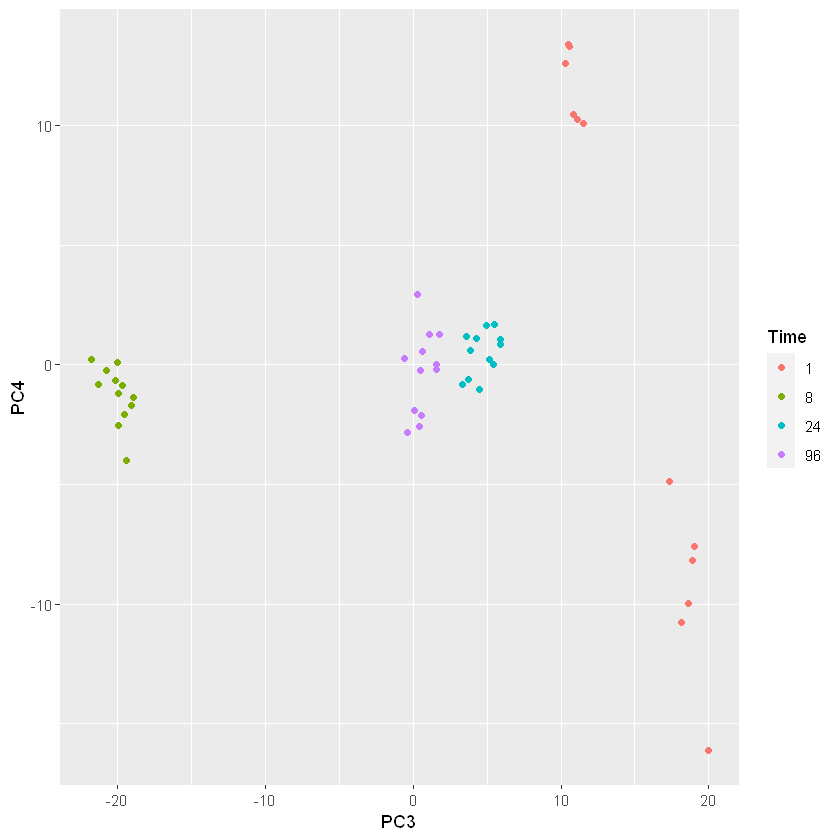

In [11]:
# Create data frame with metadata and PC3 and PC4 values for input to ggplot
df <- cbind(samples, pca$x)
ggplot(df) + geom_point(aes(x=PC3, y=PC4, color = Time))

In [12]:
### Extract the rlog matrix from the object
rld_mat <- assay(rld)    ## assay() is function from the "SummarizedExperiment" package that was loaded when you loaded DESeq2

In [13]:
### Compute pairwise correlation values
rld_cor <- cor(rld_mat)    ## cor() is a base R function

head(rld_cor)   ## check the output of cor(), make note of the rownames and colnames

,C_1_A,C_1_B,C_1_C,C_1_D,C_1_E,C_1_F,C_8_A,C_8_B,C_8_C,C_8_D,...,V_24_C,V_24_D,V_24_E,V_24_F,V_96_A,V_96_B,V_96_C,V_96_D,V_96_E,V_96_F
C_1_A,1.0000000,0.9981413,0.9982691,0.9981970,0.9981102,0.9981103,0.9954881,0.9957069,0.9952711,0.9954089,...,0.9900807,0.9899364,0.9905971,0.9904765,0.9809202,0.9799958,0.9806420,0.9803470,0.9811947,0.9807837
C_1_B,0.9981413,1.0000000,0.9983720,0.9981165,0.9981235,0.9980838,0.9955503,0.9957781,0.9954102,0.9954751,...,0.9902365,0.9900278,0.9907457,0.9905742,0.9808168,0.9799028,0.9805062,0.9803309,0.9811738,0.9807059
C_1_C,0.9982691,0.9983720,1.0000000,0.9983522,0.9983784,0.9983029,0.9956466,0.9957883,0.9955113,0.9955289,...,0.9902015,0.9899673,0.9907470,0.9905796,0.9804467,0.9796102,0.9802553,0.9800712,0.9808014,0.9803739
C_1_D,0.9981970,0.9981165,0.9983522,1.0000000,0.9982431,0.9982720,0.9955352,0.9957200,0.9953022,0.9954682,...,0.9899531,0.9898123,0.9905354,0.9904441,0.9803518,0.9794133,0.9800676,0.9798040,0.9806913,0.9802333
C_1_E,0.9981102,0.9981235,0.9983784,0.9982431,1.0000000,0.9982928,0.9953964,0.9955862,0.9951607,0.9952639,...,0.9899586,0.9897422,0.9906383,0.9905126,0.9804850,0.9797088,0.9803151,0.9800550,0.9808670,0.9804887
C_1_F,0.9981103,0.9980838,0.9983029,0.9982720,0.9982928,1.0000000,0.9955438,0.9957169,0.9953247,0.9954869,...,0.9903439,0.9901841,0.9908985,0.9908038,0.9811215,0.9802781,0.9809057,0.9806640,0.9814852,0.9811099


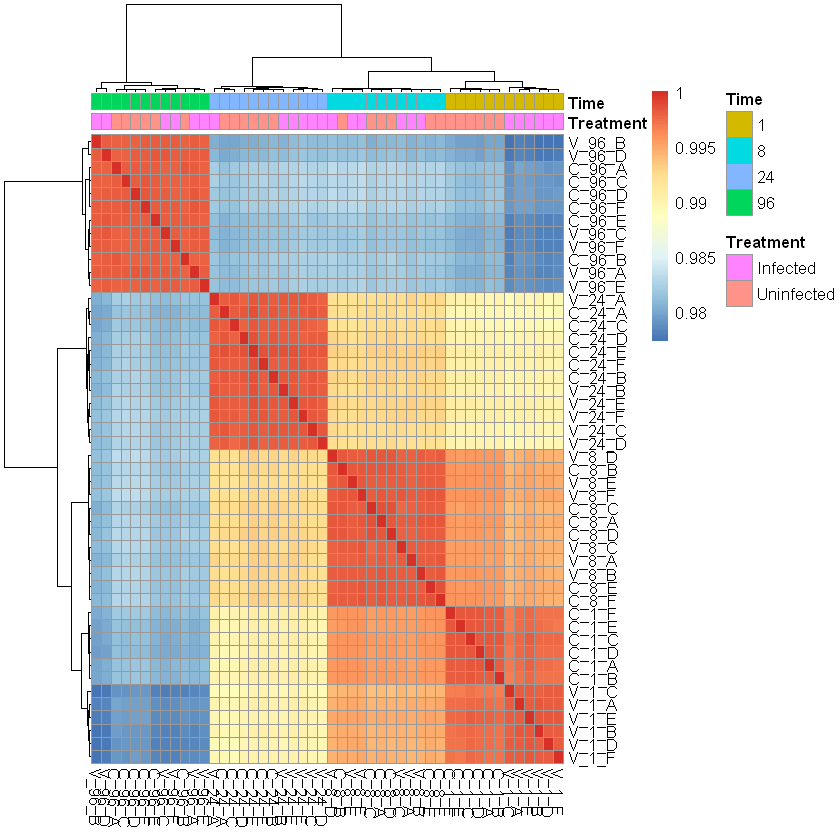

In [14]:
###Make meta df
meta <- as.data.frame(colData(dds)[,c("Treatment","Time")])
### Plot heatmap
pheatmap(rld_cor, annotation = meta)

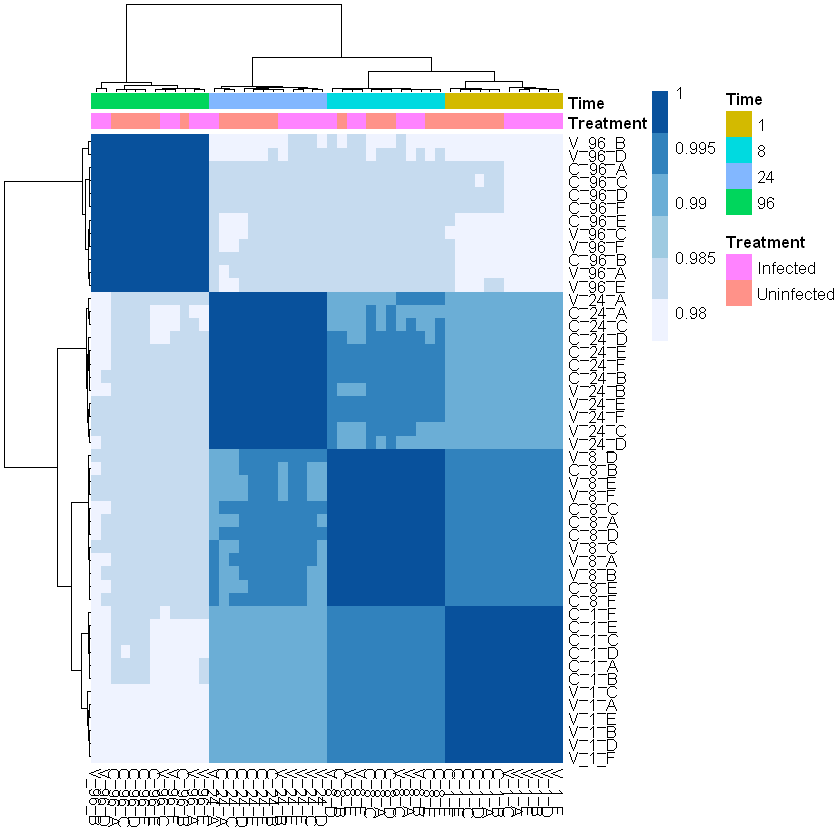

In [15]:
heat.colors <- brewer.pal(6, "Blues")
pheatmap(rld_cor, annotation = meta, color = heat.colors, border_color=NA, fontsize = 10, 
  		fontsize_row = 10, height=20)

In [16]:
dds <- DESeq(dds)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [17]:
## Check the size factors
##sizeFactors(dds) Not needed as we used tximport

In [18]:
## Total number of raw counts per sample
colSums(counts(dds))

C_1_A    C_1_B    C_1_C    C_1_D    C_1_E    C_1_F    C_8_A    C_8_B 
36055406 30446178 53806552 40477853 41892415 35113843 43966924 42490565 
   C_8_C    C_8_D    C_8_E    C_8_F   C_24_A   C_24_B   C_24_C   C_24_D 
50225755 44979520 38386529 44702168 40003875 42831251 39030598 32109636 
  C_24_E   C_24_F   C_96_A   C_96_B   C_96_C   C_96_D   C_96_E   C_96_F 
49968229 39001001 36680925 33524817 38435406 31432991 33741279 37315021 
   V_1_A    V_1_B    V_1_C    V_1_D    V_1_E    V_1_F    V_8_A    V_8_B 
45070930 38081505 36479058 43700443 50061276 38109419 34289698 32478084 
   V_8_C    V_8_D    V_8_E    V_8_F   V_24_A   V_24_B   V_24_C   V_24_D 
38089026 32647532 34524733 36862025 44793808 41951252 41413513 34456690 
  V_24_E   V_24_F   V_96_A   V_96_B   V_96_C   V_96_D   V_96_E   V_96_F 
42774843 35999234 40914371 37440735 32943516 38711099 33549261 31594934

In [19]:
## Total number of normalized counts per sample
colSums(counts(dds, normalized=T))

C_1_A    C_1_B    C_1_C    C_1_D    C_1_E    C_1_F    C_8_A    C_8_B 
41113885 41008971 40496791 40142190 39725312 40134902 38943455 39213477 
   C_8_C    C_8_D    C_8_E    C_8_F   C_24_A   C_24_B   C_24_C   C_24_D 
39817256 38989017 37635946 37549212 36360747 36770756 35192670 37017226 
  C_24_E   C_24_F   C_96_A   C_96_B   C_96_C   C_96_D   C_96_E   C_96_F 
36325273 35170714 39626223 40935484 38850225 39571201 39920121 39530407 
   V_1_A    V_1_B    V_1_C    V_1_D    V_1_E    V_1_F    V_8_A    V_8_B 
39779471 39355746 39586168 40061092 39429501 39815786 37494386 38096735 
   V_8_C    V_8_D    V_8_E    V_8_F   V_24_A   V_24_B   V_24_C   V_24_D 
38138176 39357054 38479682 38170947 34960976 36663099 36583668 37428299 
  V_24_E   V_24_F   V_96_A   V_96_B   V_96_C   V_96_D   V_96_E   V_96_F 
36119392 36152450 40401939 41069668 40301281 40736911 40943562 40784618

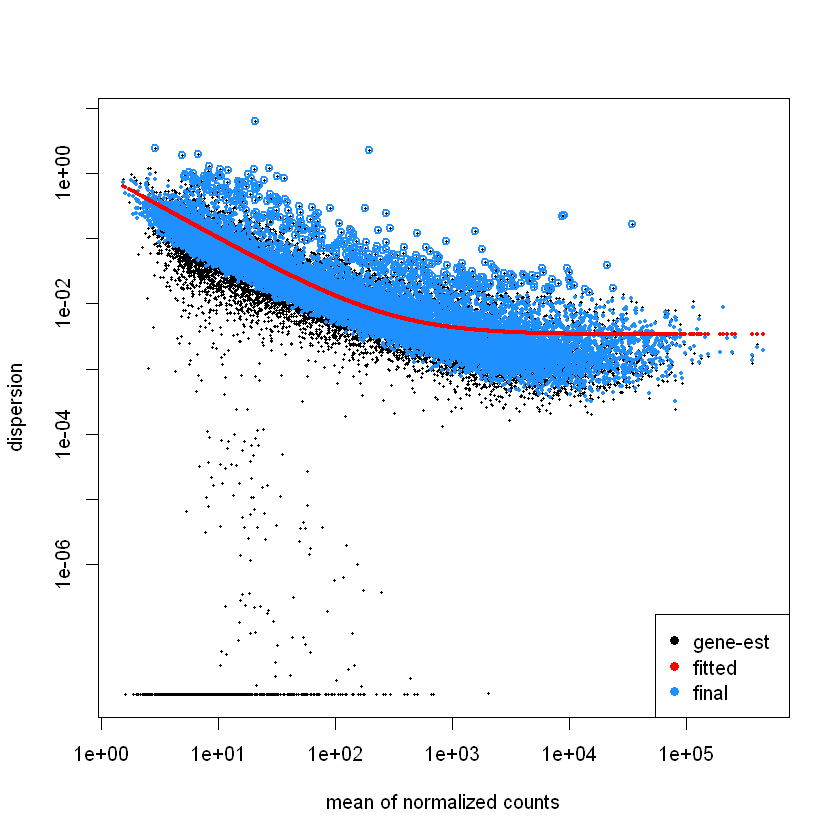

In [20]:
## Plot dispersion estimates
plotDispEsts(dds)

In [21]:
?results

results {DESeq2},R Documentation
object,"a DESeqDataSet, on which one of the following functions has already been called: DESeq, nbinomWaldTest, or nbinomLRT"
contrast,"this argument specifies what comparison to extract from the object to build a results table. one of either: a character vector with exactly three elements: the name of a factor in the design formula, the name of the numerator level for the fold change, and the name of the denominator level for the fold change (simplest case) a list of 2 character vectors: the names of the fold changes for the numerator, and the names of the fold changes for the denominator. these names should be elements of resultsNames(object). if the list is length 1, a second element is added which is the empty character vector, character(). (more general case, can be to combine interaction terms and main effects) a numeric contrast vector with one element for each element in resultsNames(object) (most general case) If specified, the name argument is ignored."
name,"the name of the individual effect (coefficient) for building a results table. Use this argument rather than contrast for continuous variables, individual effects or for individual interaction terms. The value provided to name must be an element of resultsNames(object)."
lfcThreshold,"a non-negative value which specifies a log2 fold change threshold. The default value is 0, corresponding to a test that the log2 fold changes are equal to zero. The user can specify the alternative hypothesis using the altHypothesis argument, which defaults to testing for log2 fold changes greater in absolute value than a given threshold. If lfcThreshold is specified, the results are for Wald tests, and LRT p-values will be overwritten."
altHypothesis,"character which specifies the alternative hypothesis, i.e. those values of log2 fold change which the user is interested in finding. The complement of this set of values is the null hypothesis which will be tested. If the log2 fold change specified by name or by contrast is written as beta , then the possible values for altHypothesis represent the following alternate hypotheses: greaterAbs: |beta| > lfcThreshold , and p-values are two-tailed lessAbs: |beta| < lfcThreshold , p-values are the maximum of the upper and lower tests. The Wald statistic given is positive, an SE-scaled distance from the closest boundary greater: beta > lfcThreshold less: beta < -lfcThreshold"
listValues,"only used if a list is provided to contrast: a numeric of length two: the log2 fold changes in the list are multiplied by these values. the first number should be positive and the second negative. by default this is c(1,-1)"
cooksCutoff,"theshold on Cook's distance, such that if one or more samples for a row have a distance higher, the p-value for the row is set to NA. The default cutoff is the .99 quantile of the F(p, m-p) distribution, where p is the number of coefficients being fitted and m is the number of samples. Set to Inf or FALSE to disable the resetting of p-values to NA. Note: this test excludes the Cook's distance of samples belonging to experimental groups with only 2 samples."
independentFiltering,"logical, whether independent filtering should be applied automatically"
alpha,"the significance cutoff used for optimizing the independent filtering (by default 0.1). If the adjusted p-value cutoff (FDR) will be a value other than 0.1, alpha should be set to that value."
filter,the vector of filter statistics over which the independent filtering will be optimized. By default the mean of normalized counts is used.


In [54]:
resultsNames(dds)

# Not interested in contrasting any of these

[1] "Intercept"                        "Time_8_vs_1"                     
[3] "Time_24_vs_1"                     "Time_96_vs_1"                    
[5] "Treatment_Uninfected_vs_Infected"

In [35]:
## From here down dosent work

In [36]:
## Define contrasts, extract results table, and shrink the log2 fold changes

contrast_1 <- c("Time1.TreatmentInfected", "Time1.TreatmentUninfected")
contrast_8 <- c("Time8.TreatmentInfected", "Time8.TreatmentUninfected")
contrast_24 <- c("Time24.TreatmentInfected", "Time24.TreatmentUninfected")
contrast_96 <- c("Time96.TreatmentInfected", "Time96.TreatmentUninfected")

res_table_1 <- results(dds, contrast=contrast_1, alpha = 0.05, lfcThreshold = 0.58)
res_table_8 <- results(dds, contrast=contrast_8, alpha = 0.05, lfcThreshold = 0.58)
res_table_24 <- results(dds, contrast=contrast_24, alpha = 0.05, lfcThreshold = 0.58)
res_table_96 <- results(dds, contrast=contrast_96, alpha = 0.05, lfcThreshold = 0.58)

ERROR: Error in checkContrast(contrast, resNames): 'contrast', as a character vector of length 3, should have the form:
contrast = c('factorName','numeratorLevel','denominatorLevel'),
see the manual page of ?results for more information


In [107]:
class(res_table_1)

[1] "DESeqResults"
attr(,"package")
[1] "DESeq2"

In [108]:
mcols(res_table_1, use.names=T)

DataFrame with 6 rows and 2 columns
                       type            description
                <character>            <character>
baseMean       intermediate mean of normalized c..
log2FoldChange      results log2 fold change (ML..
lfcSE               results standard error: Trt_..
stat                results Wald statistic: Trt_..
pvalue              results Wald test p-value: T..
padj                results   BH adjusted p-values

In [109]:
res_table_1 %>% data.frame() %>% View()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TRINITY_DN0_c0_g1,4898.712104,0.210116016,0.02331269,0.0000000,1.00000000,1
TRINITY_DN0_c0_g2,9.299546,0.438524391,0.34326004,0.0000000,1.00000000,1
TRINITY_DN0_c1_g1,259.542125,-0.367983662,0.10516348,0.0000000,1.00000000,1
TRINITY_DN0_c10_g1,1446.017687,-0.166869963,0.03026031,0.0000000,1.00000000,1
TRINITY_DN0_c11_g1,6.576095,0.753797609,0.41938029,0.4144153,0.67856998,1
TRINITY_DN0_c142_g1,84.534552,0.196676960,0.12715418,0.0000000,1.00000000,1
TRINITY_DN0_c15_g1,71.669703,0.011562284,0.14955774,0.0000000,1.00000000,1
TRINITY_DN0_c2_g1,5.545240,-1.530496463,0.48734815,-1.9503439,0.05113515,1
TRINITY_DN0_c20_g1,35.304042,0.537921960,0.20142297,0.0000000,1.00000000,1


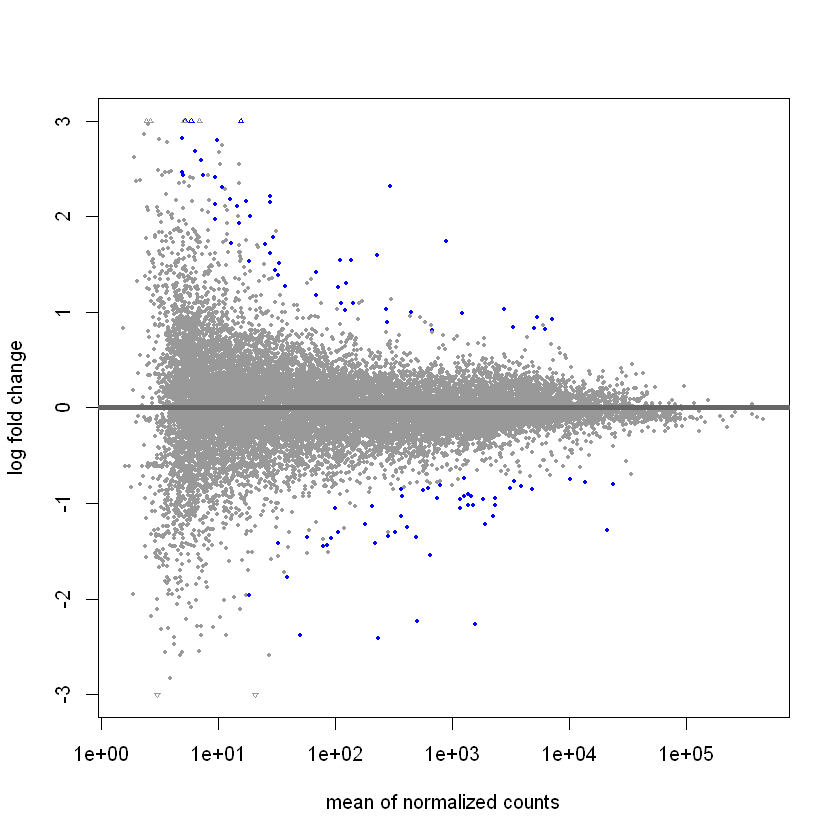

In [110]:
plotMA(res_table_1, ylim=c(-3,3))

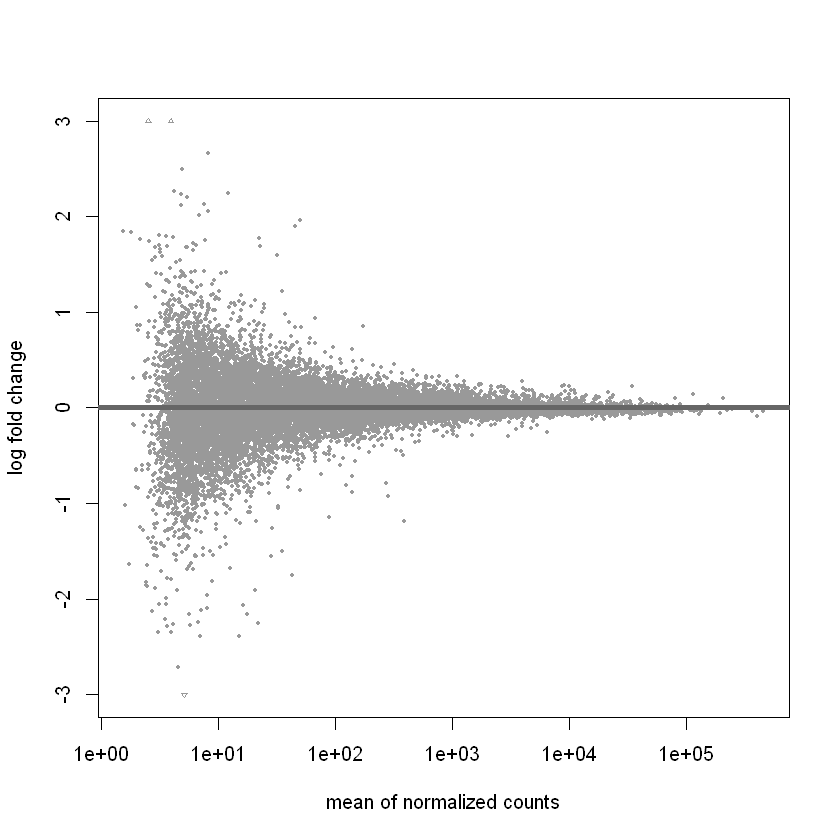

In [111]:
plotMA(res_table_8, ylim=c(-3,3))

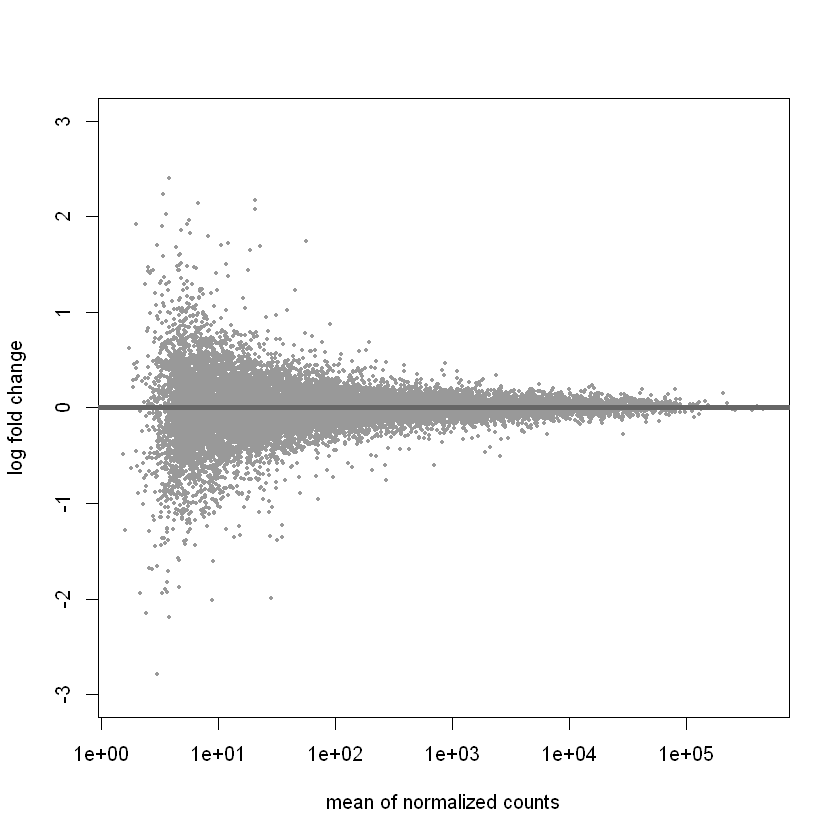

In [112]:
plotMA(res_table_24, ylim=c(-3,3))

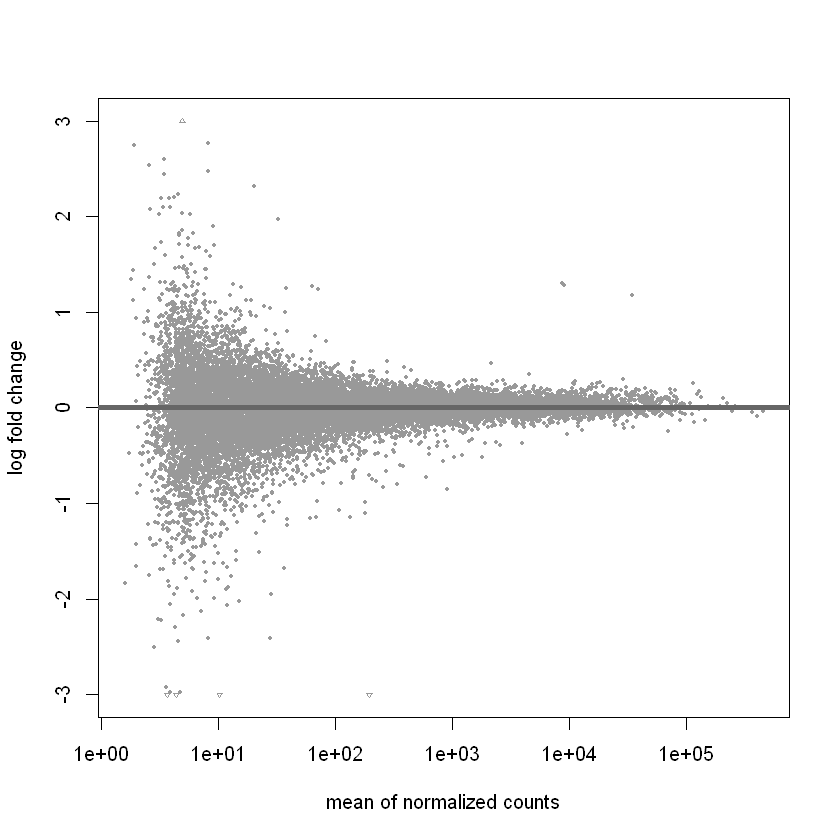

In [113]:
plotMA(res_table_96, ylim=c(-3,3))

In [114]:
summary(res_table_1, alpha = 0.05)


out of 17779 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.58 (up)    : 53, 0.3%
LFC < -0.58 (down) : 49, 0.28%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [115]:
summary(res_table_8, alpha = 0.05)


out of 17779 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.58 (up)    : 0, 0%
LFC < -0.58 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [116]:
summary(res_table_24, alpha = 0.05)


out of 17779 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.58 (up)    : 0, 0%
LFC < -0.58 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [117]:
summary(res_table_96, alpha = 0.05)


out of 17779 with nonzero total read count
adjusted p-value < 0.05
LFC > 0.58 (up)    : 0, 0%
LFC < -0.58 (down) : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [118]:
### Set thresholds
padj.cutoff <- 0.05

In [119]:
res_table_1_tb <- res_table_1 %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

In [120]:
res_table_8_tb <- res_table_8 %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

In [121]:
res_table_24_tb <- res_table_24 %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

In [122]:
res_table_96_tb <- res_table_96 %>%
  data.frame() %>%
  rownames_to_column(var="gene") %>% 
  as_tibble()

In [123]:
sig_1 <- res_table_1_tb %>%
        filter(padj < padj.cutoff)

In [124]:
sig_8 <- res_table_8_tb %>%
        filter(padj < padj.cutoff)

In [125]:
sig_24 <- res_table_24_tb %>%
        filter(padj < padj.cutoff)

In [126]:
sig_96 <- res_table_96_tb %>%
        filter(padj < padj.cutoff)

In [128]:
meta_tb <- meta %>% 
              rownames_to_column(var="samplename") %>% 
              as_tibble()

In [149]:
DEGreport::degPlot(dds = dds, res = sig_1, genes = rownames(dds)[1:10], xs = "group") # dds object is output from DESeq2

No genes were mapped to rowData. check ann parameter values.

Using gene as id variables



ERROR: Error in `$<-.data.frame`(`*tmp*`, "xs", value = structure(integer(0), .Label = character(0), class = "factor")): replacement has 0 rows, data has 480
